In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
import scipy as sp

# Titanic Dataset

Below we import the titanic dataset as `df`. Drop all na values from the dataframe `df` after importing, what assumption are making when we drop these values? 

In [2]:
sns.set(style='white', font_scale=1.5)
df = sns.load_dataset('titanic')

In [20]:
df.dropna(inplace=True)

Using the `head()` method print out the first `10` lines of the dataset. 

In [3]:
df.head(n=10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In class we breifly discussed the `pclass` and sepculated what the ordering was for this class (i.e. does `1` represent 1st class or does `3`). We can plot out the distribution of `fare` in each class to validate any intution we might have.

Use seaborn to make a boxplot of `fare` against each category of `pclass`. Additionally, remove the top and right-hand axes line.

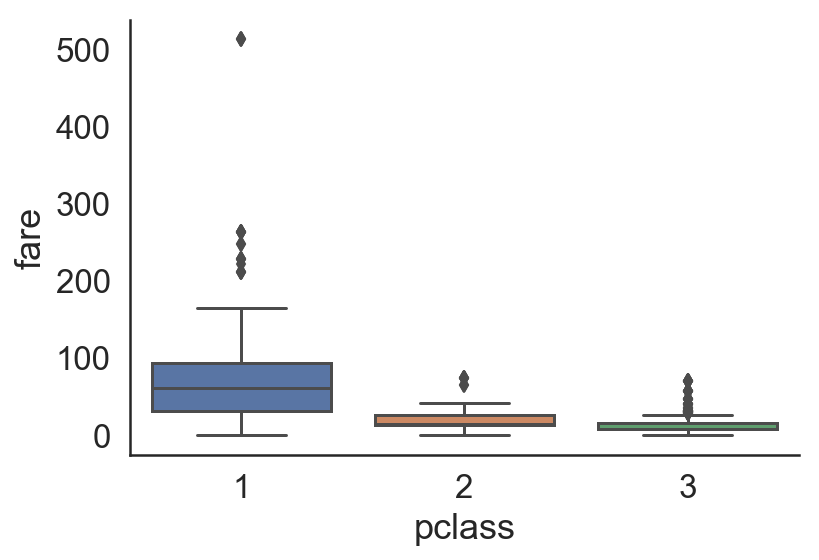

In [4]:
sns.boxplot(x=df.pclass, y=df.fare)
sns.despine()

Given this distribtuion of fares which value of `pclass` do you think corresponds to 1st class?

# Does Fare Price Relate to Whether Passangers Survived?

We may want to explore where there is a relationship between the `fare` passangers paid and whether they survived. Create a boxplot to investigate this relationship.

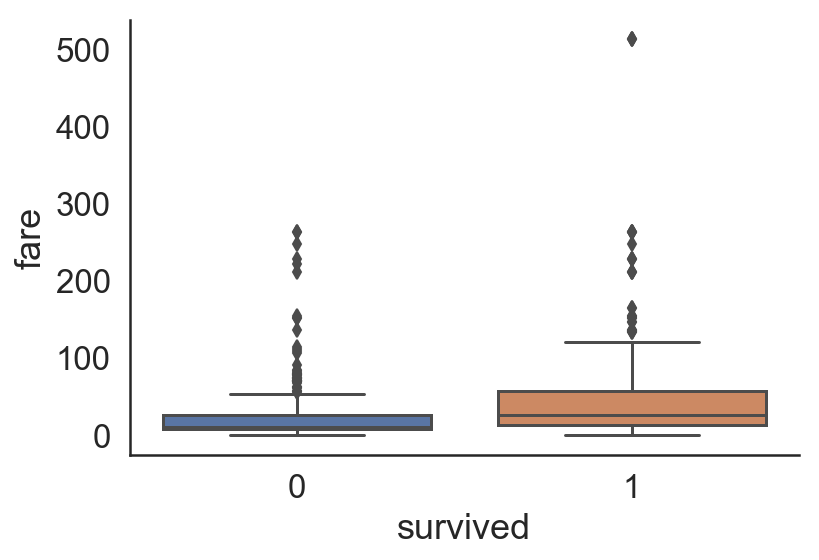

In [5]:
sns.boxplot(x=df.survived, y=df.fare)
sns.despine()

What do you notice about these distributions? Do they look skewed? Plot out a histogram of fare to investigate the skew.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


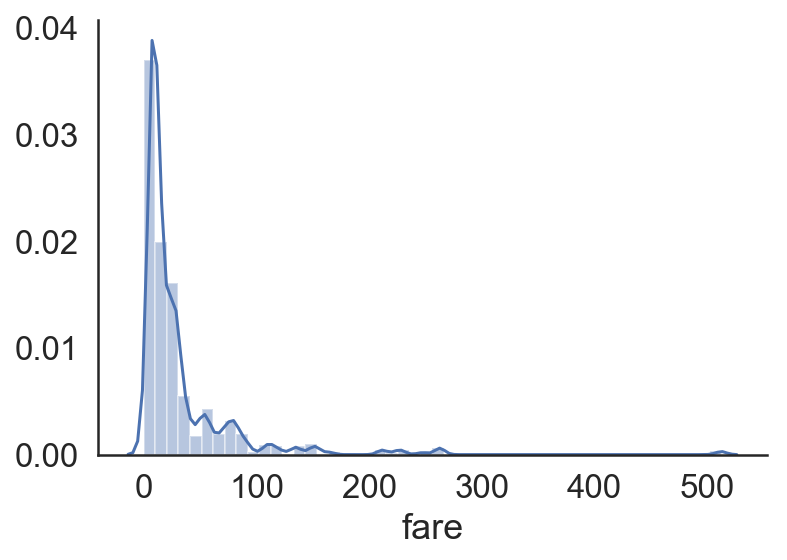

In [6]:
sns.distplot(df.fare)
sns.despine()

In order to perform many statistical tests in data science we want data that is not skewed, one way of transforming data skewed data to be less skewed is to log transform it - as we did in the assingment. 

Create the same boxplot you did above categorized by whether they survived, but log transform the fare. (You may need to add a small value like `0.1` to avoid numerical issues with taking the `log` of `0` or a negative number. 

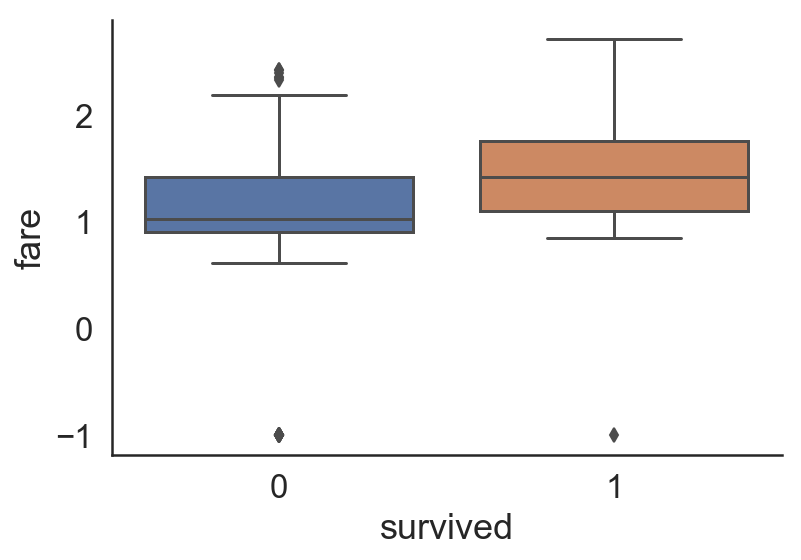

In [7]:
sns.boxplot(x=df.survived, y=np.log10(df.fare+.1))
sns.despine()

After log transforming the data we can see that the data looks less skewed, we can test to see if there is a significant difference in fare between people who survived and those that did not. 

To test this difference we will perform a t-test, this is a standard statistical test that it used to see if a quantative measurement is different between groups, [here](http://docs.statwing.com/examples-and-definitions/t-test/) is a webpage that gives some description of the test. 

Using the `scipy` `ttest_ind` function, in the `stats` module, test whether there is a significant difference. Remember to use log transformed `fare` values. 

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


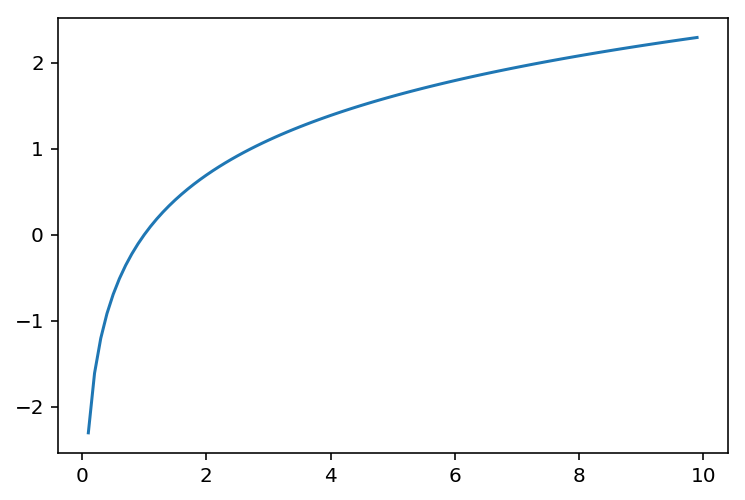

In [5]:
x = np.arange(0,10,0.1)
y = np.log(x)
plt.plot(x, y)


In [8]:
sp.stats.ttest_ind(np.log(df.fare[df.survived==1] + 0.1),
                  np.log(df.fare[df.survived==0] + 0.1))

Ttest_indResult(statistic=9.771806692421213, pvalue=1.7152589246031277e-21)

The p value here is very low which indicates that observed difference in fares would have been very unlikely had they been from the same distribution - i.e. this shows there is a significant difference in fare for those that survived vs those that did not.

# Relationship of Age and Fare on Survival

Another relationship we may be interested in investigating is the relationship between `age` and `survival`. First plot out a boxplot of `age` of passengers categorized by whehter they survived - similar to above.

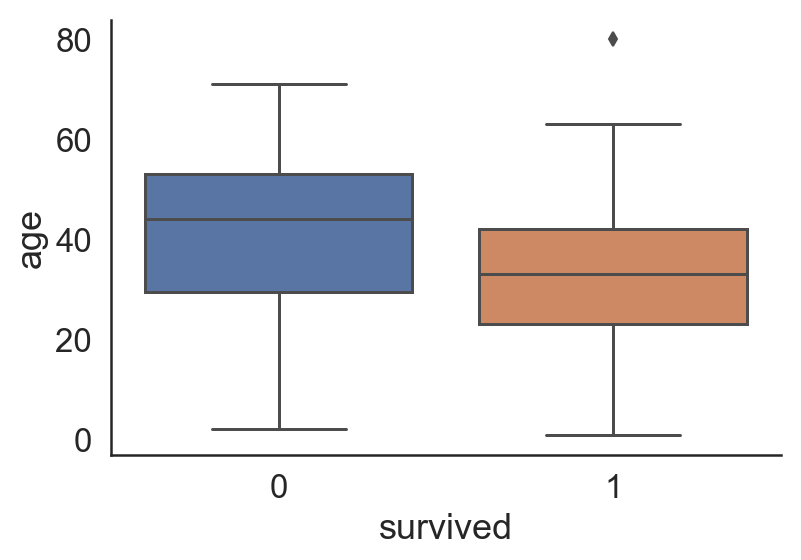

In [55]:
sns.boxplot(x=df.survived, y=df.age)
sns.despine()

Does it it look like there is a significant difference between the two groups with reference to age, test this using the same t-test as above. 

*Note: you do NOT need to log transform age as it is not skewed in this dataset*

In [63]:
sp.stats.ttest_ind(df.age[df.survived==1], df.age[df.survived==0])

Ttest_indResult(statistic=-3.4795576697001755, pvalue=0.0006299945448858168)

Is there a significant association? - a pvalue less than 0.05 is generally considered a significant.

Although we may see an association between age and whether they survived, this could be driven by the fact that older people tend to have more money and therefore buy more expensive tickets (and we know that fare is also associated with survival). Therefore we want to take into account the fact that older people tend to have more expensive fares when associating `age` with `fare`. We will do this by using a logistic model, first create a scatter plot of `age` against `fare` with each point beign colored by whether they `survived`.

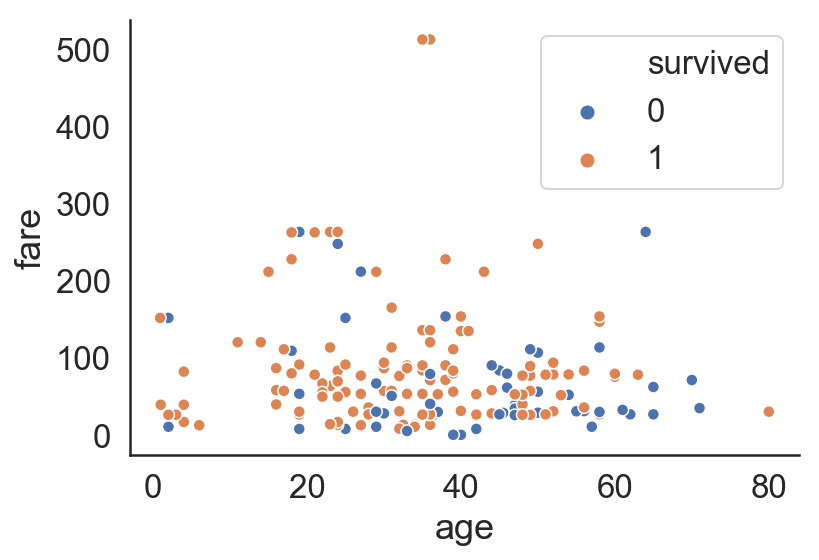

In [54]:
sns.scatterplot(df.age, df.fare, hue=df.survived)
sns.despine()

Now we want to test whether fare and age are associated with survival when we partial out the effect of each. To do this we will try to predict `survival` from `age` and `fare` using a logistic regression. (We are using logistic regression as the outcome variable, `survival`, is binary i.e. 1 or 0). To do this use the code below to set `X` as the predictors and `y` as the outcome, provided you do this correctly you should see a table produced that shows the relationship of `fare` and `age` with `survival`.

In [60]:
X = df.loc[:, ['fare', 'age']]
y = df.loc[:, 'survived']
model = smf.Logit(y, X)
model.fit().summary()

Optimization terminated successfully.
         Current function value: 0.627024
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  182
Model:                          Logit   Df Residuals:                      180
Method:                           MLE   Df Model:                            1
Date:                Wed, 06 Feb 2019   Pseudo R-squ.:                0.004688
Time:                        22:12:17   Log-Likelihood:                -114.12
converged:                       True   LL-Null:                       -114.66
                                        LLR p-value:                    0.2998
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
fare           0.0088      0.003      3.235      0.001       0.003       0.014
age           -0.0023      0.006     -0.402      0.688      -0.013       0.009
==============================================================================
"""

Given these results it looks like `age` is no longer associated (p>0.05) with `survival`, while `fare` is still significatly associated (p<0.05). This suggests that the assocation between `age` and `survival` was primarily driven by the effect of `fare`.

# Plotting Aesthetics

One of the great things about visualizing data is that it is often a more apealing way of view data and so the aesthetics of a plot can be something to consider. A benefit of `seaborn` is that the plots it creates are usually very nice looking, but there are different settings one can use for particular tastes or contexts (e.g. presenting in a talk vs displaying on a webpage). [This page](https://seaborn.pydata.org/tutorial/aesthetics.html) shows some of the different aesthetic options that be made within seaborn. 

Explore some of these choices with the plots above to see what you like best.